# Linear Regression Assignment
## Bike Sharing

### Problem statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

### The steps we will follow in this exercise are as bellow
1. Reading and visuallysing the data
2. The Preparing the data for modeling
3. Training the model
4. Residual Analysis
5. Prediction on the test set

In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Reading and understanding the data

In [3]:
day_df = pd.read_csv("day.csv")
print(day_df.shape)
day_df.sample(10)

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
457,458,03-04-2019,2,1,4,0,2,1,1,19.133347,23.07415,39.6667,6.708911,1348,5424,6772
567,568,22-07-2019,3,1,7,0,0,0,2,27.367500,31.15625,76.2500,6.292694,2544,4866,7410
696,697,28-11-2019,4,1,11,0,3,1,1,12.163347,14.48810,50.6250,14.125007,198,5062,5260
259,260,17-09-2018,3,0,9,0,6,0,2,20.158347,23.92560,71.8333,12.708225,1434,3077,4511
127,128,08-05-2018,2,0,5,0,0,0,1,21.661653,25.94665,63.1667,5.000712,1401,2932,4333
289,290,17-10-2018,4,0,10,0,1,1,1,21.900847,25.53625,57.9583,11.750393,713,3857,4570
647,648,10-10-2019,4,1,10,0,3,1,1,21.080847,25.15710,63.0833,12.584007,780,6911,7691
391,392,27-01-2019,1,1,1,0,5,1,2,17.425000,20.76915,74.1250,22.958689,269,3187,3456
174,175,24-06-2018,3,0,6,0,5,1,1,29.690847,32.82915,57.3333,14.875675,969,4022,4991
431,432,08-03-2019,1,1,3,0,4,1,1,21.627500,26.23020,56.7500,29.584721,486,4896,5382


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- You can see there are 15 number and only One object type columns
- Also we can see there is no null records in any off the columns

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# lets understand the dteday fields
print(set(day_df["dteday"].apply(lambda x: x.split("-")[-1])))

{'2019', '2018'}


- by looking at the dteday we can tell that data is only for two years 2018 and 2019
- Now as we already have mnth and yr columns to tell about mounth and years 0: 2018 and 1: 2019 so we actully need only day from dteday then we can drop this colums

So lets do it

In [7]:
# creating columns as day of date
day_df['days'] = day_df["dteday"].apply(lambda x: x.split("-")[0])

# droping dteday column
day_df.drop('dteday', axis=1, inplace=True)

# just checking the if it worked as expected
day_df.head(15)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,01
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,02
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,03
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,04
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,05
5,6,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,06
6,7,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,07
7,8,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959,08
8,9,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822,09
9,10,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321,10


- instant column also does not make any sence as it is just an index provided in csv so lets drop it

In [8]:
# droping instant column
day_df.drop('instant', axis=1, inplace=True)

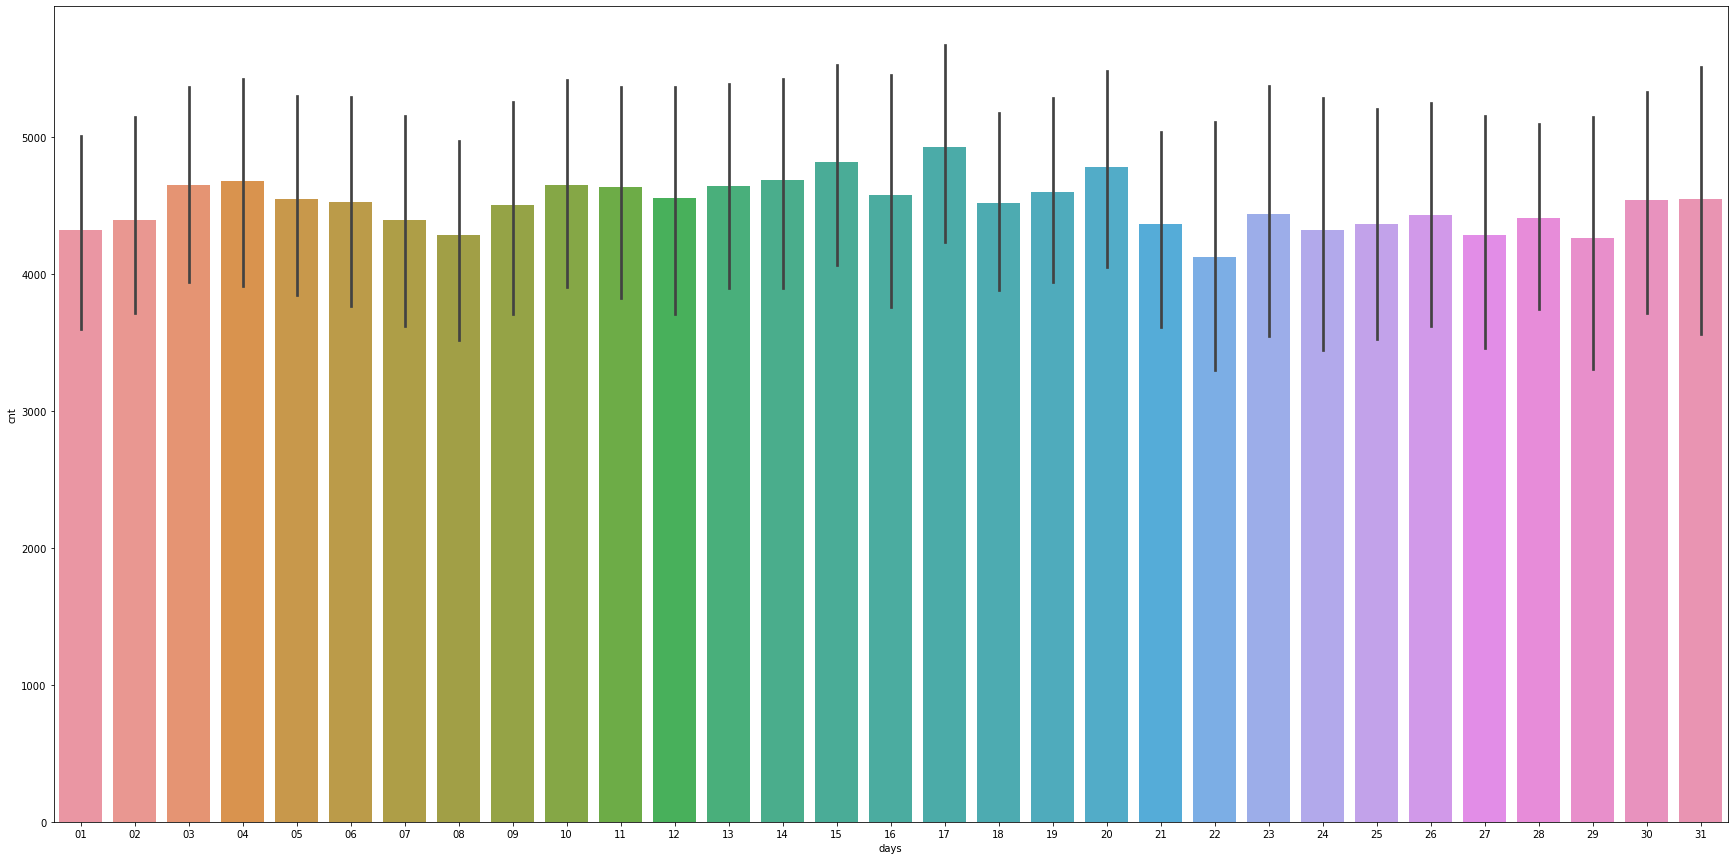

In [9]:
## Lets plot days vs cnt and if it gives any info
plt.figure(figsize=(30, 15))
sns.barplot(x='days', y='cnt', data=day_df)
plt.show()

- As you can see this days column also does not make any sence so lets drop it

In [10]:
# droping days columns
day_df.drop('days', axis=1, inplace=True)

In [11]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

### Making categorical columns as category type
- As we can see by looking at the day_df.info() our program does not recognized few categorical columns as category as they are number we now that they are nominal so lets convert them into category type

In [12]:
category_col = ['season', 'mnth', 'weekday', 'weathersit']
day_df[category_col] = day_df[category_col].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(6)
memory usage: 61.1 KB


In [13]:
# Now lets make categorical columns value more meaningfull
day_df.weekday.replace(
    {i: v for i, v in enumerate(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])},
    inplace=True
)
day_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
day_df.mnth.replace(
    {ind:v for ind,v in enumerate([datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)], start=1)},
    inplace=True
)
day_df.weathersit.replace({1: "clear", 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,January,0,Monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,January,0,Tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,January,0,Wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


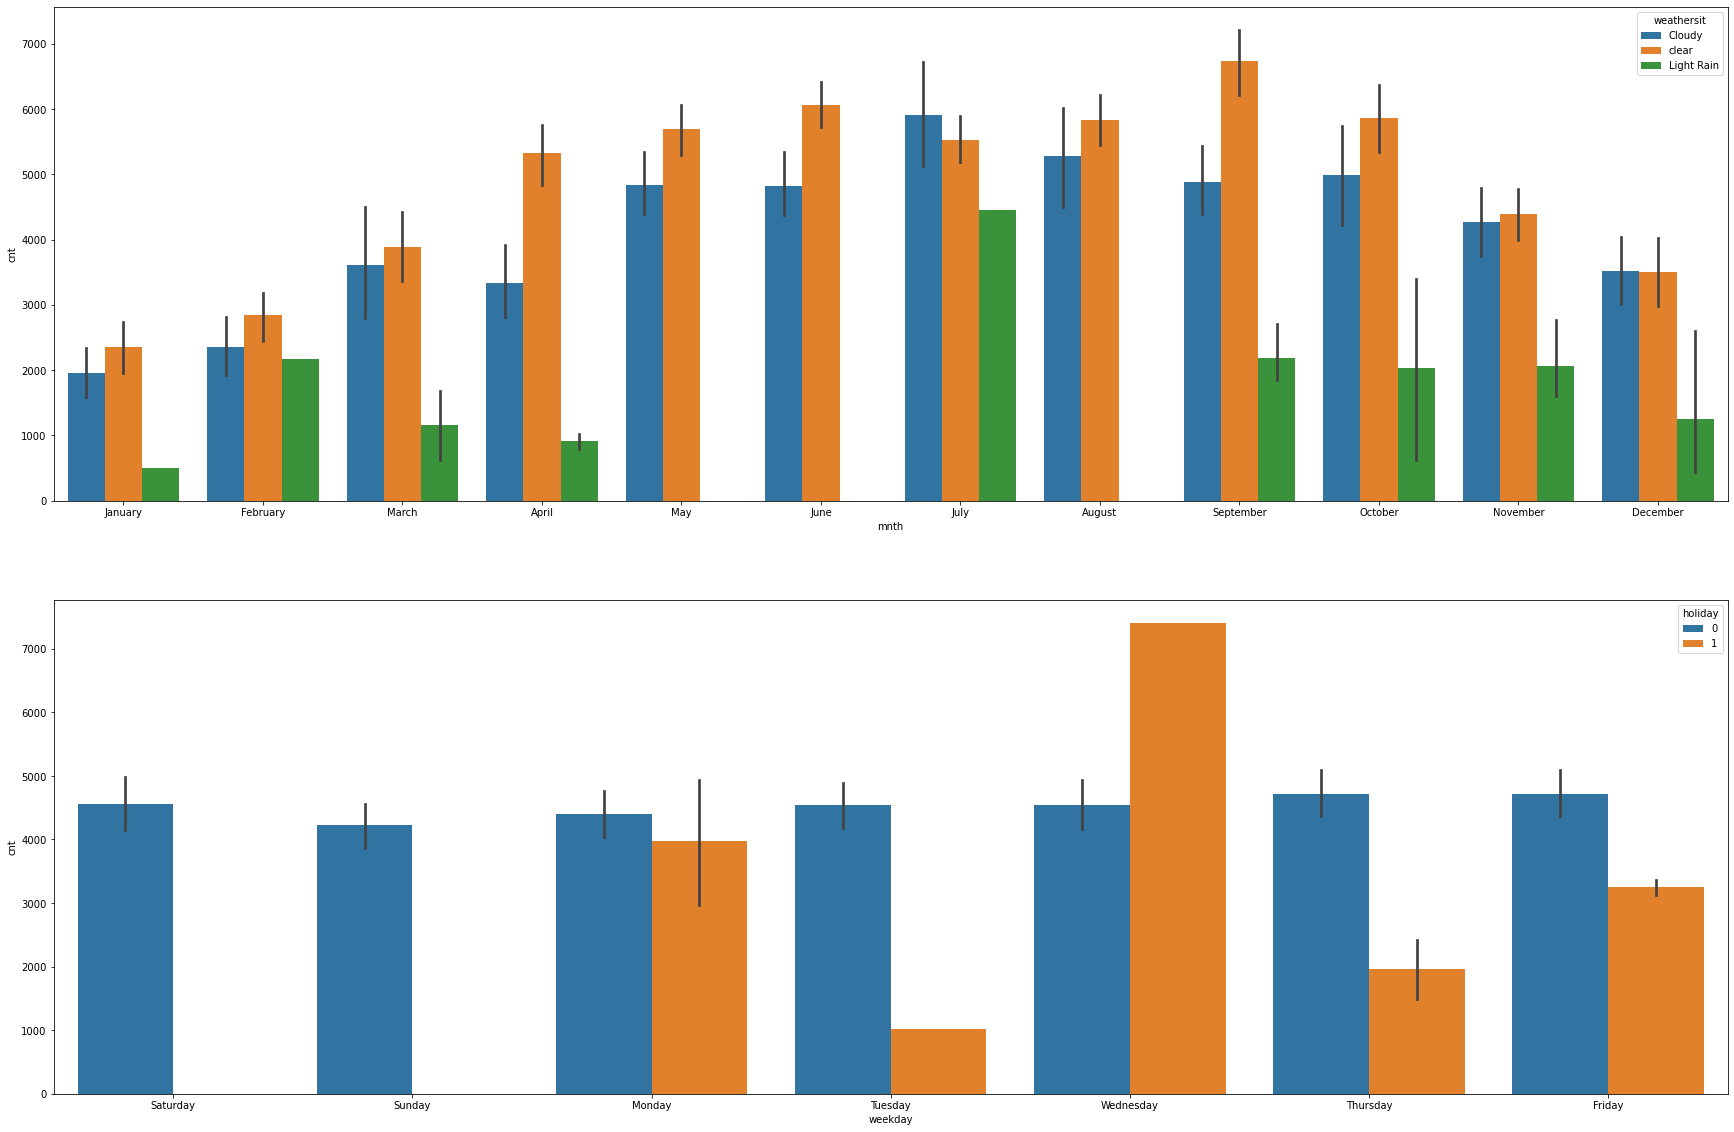

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(2,1,1)
sns.barplot(x='mnth', y='cnt', data=day_df, hue='weathersit')

plt.subplot(2,1,2)
sns.barplot(x='weekday', y='cnt', data=day_df, hue='holiday')
plt.show()

- well, what we have figured out that On  Wednesday (i.e if you 1 to 7) requirment for bike is highest when there is holiday
- In months wise Septembr seems to showing slitly huge count

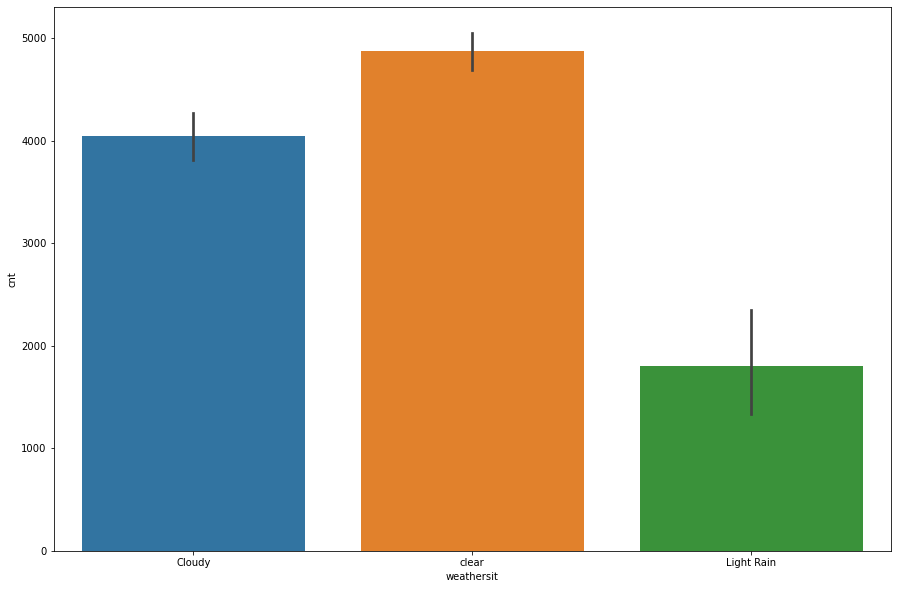

In [15]:
# now lets see the effect of season on bike requirments

plt.figure(figsize=(15, 10))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.show()

- Requirment for bike is more in clear Weather

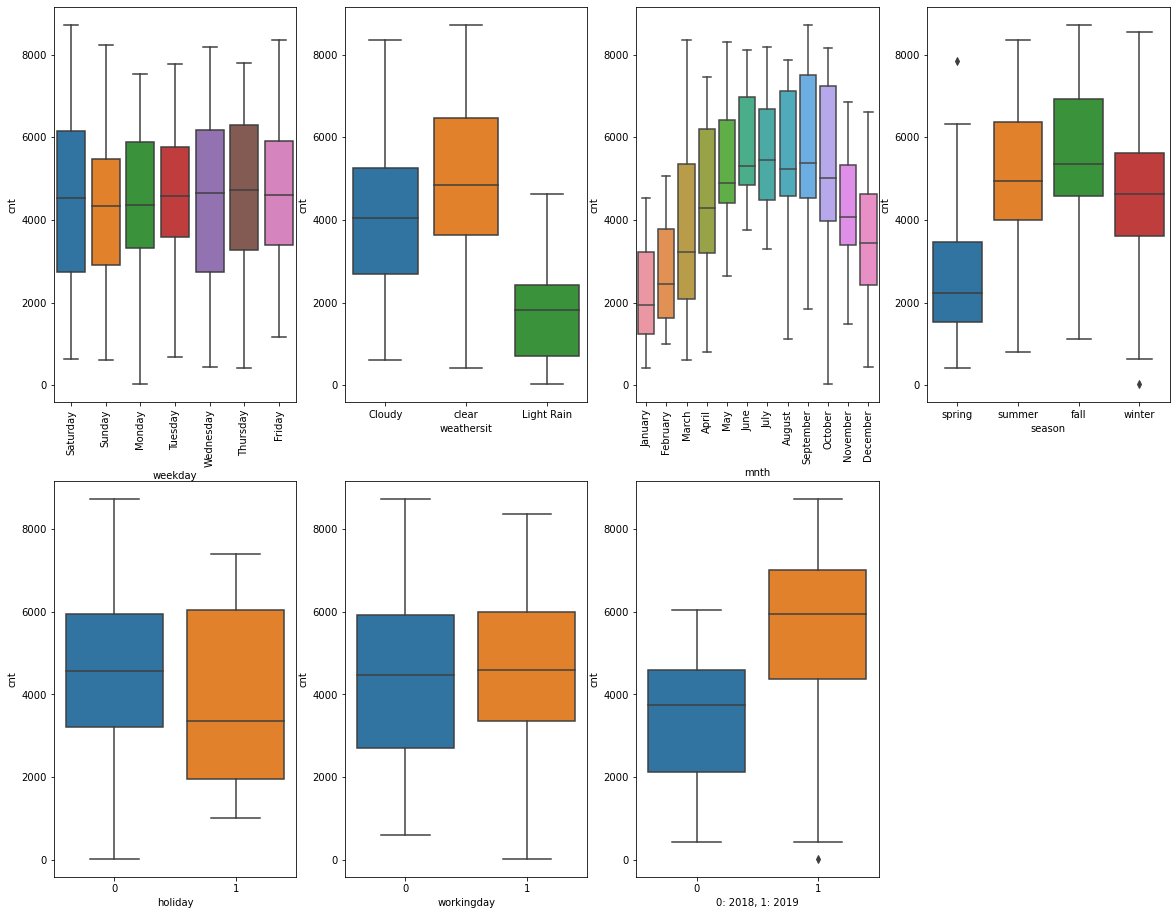

In [16]:
# visualysing the categorical variable
plt.figure(figsize=(20,16))
plt.subplot(2,4,1)
sns.boxplot(x="weekday", y="cnt", data=day_df)
plt.xticks(rotation=90)

plt.subplot(2,4,2)
sns.boxplot(x="weathersit", y="cnt", data=day_df)

plt.subplot(2,4,3)
sns.boxplot(x="mnth", y="cnt", data=day_df)
plt.xticks(rotation=90)

plt.subplot(2,4,4)
sns.boxplot(x="season", y="cnt", data=day_df)

plt.subplot(2,4,5)
sns.boxplot(x="holiday", y="cnt", data=day_df)

plt.subplot(2,4,6)
sns.boxplot(x="workingday", y="cnt", data=day_df)

plt.subplot(2,4,7)
sns.boxplot(x="yr", y="cnt", data=day_df)
plt.xlabel("0: 2018, 1: 2019")

plt.show()

In [17]:
# lets drop the casual and registered because anyway we are only interested in total count
day_df.drop(['casual', 'registered'], axis=1, inplace=True)

In [18]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

<Figure size 1440x1080 with 0 Axes>

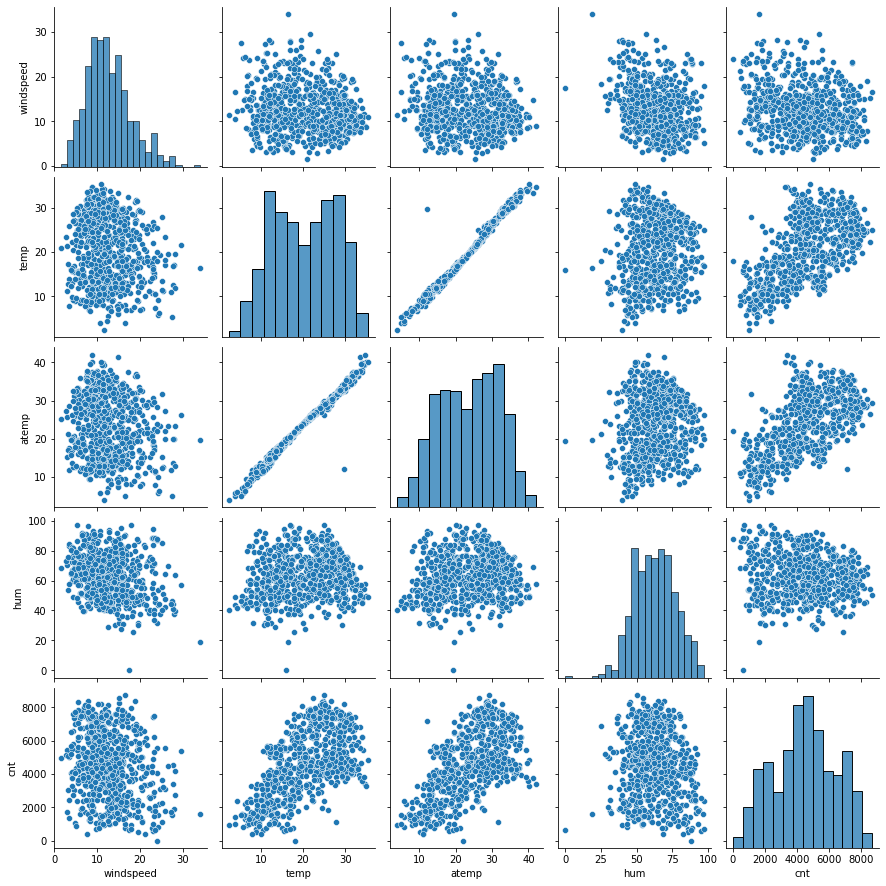

In [19]:
## Lets anallys the numerical varibales
num_col = ['windspeed', 'temp', 'atemp', 'hum', 'cnt']
plt.figure(figsize=(20,15))
sns.pairplot(day_df[num_col])
plt.show()

- By looking at the above pairplot we can say, there is a LINEAR RELATION between 'temp','atemp' and 'cnt

## Data prepare for Modeling

### Step2: Preparing the data for the modeling
- Encoding
    - convert binary var to 1/0 (wel this we don't have)
    - other categorical vars to dummy vars
- split into train and test
- rescalling the variable

In [20]:
# encoding
## creating dummy variables
# Drop first dummy variable for each set of dummies created.(we need only n-1 column if we have n columns)

status = pd.get_dummies(day_df[category_col], drop_first=True)
status.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1



### Drop first dummy variable for each set of dummies created.(we need only n-1 column if we have n columns)


In [21]:
#concating with existing days_df
day_df = pd.concat([day_df, status], axis=1)

In [22]:
#lets drop original columns
day_df.drop(category_col, axis=1, inplace=True)
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,1


-  <b>creating test and train dataset</b>

In [23]:
df_train, df_test = train_test_split(day_df, train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


- <b>Scaling the numerical columns</b>

In [24]:
scaler = MinMaxScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,0


In [25]:
df_train[num_col].describe()

,windspeed,temp,atemp,hum,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.320768,0.537262,0.512989,0.650369,0.513620
std,0.169797,0.225844,0.212385,0.145882,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.199179,0.339853,0.332086,0.538643,0.356420
50%,0.296763,0.540519,0.526811,0.653714,0.518638
75%,0.414447,0.735215,0.688457,0.754830,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


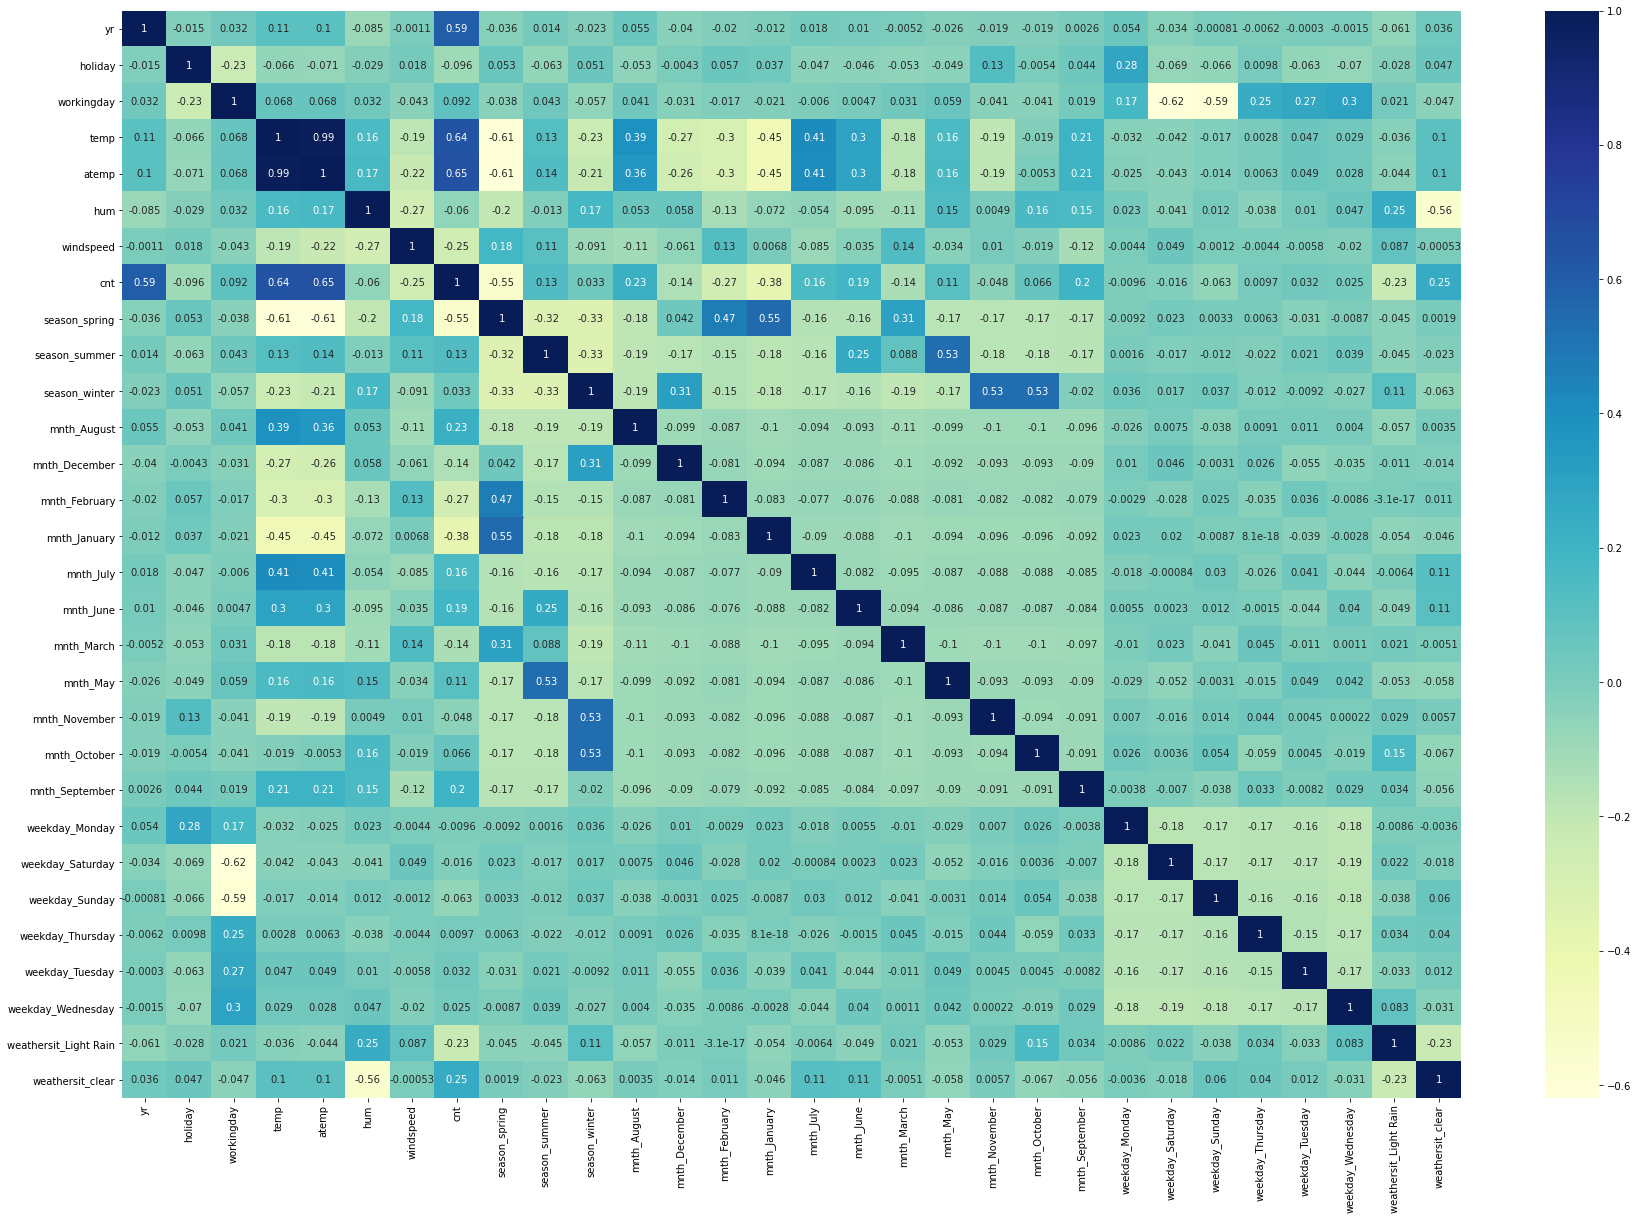

In [26]:
# drawing the heat map
plt.figure(figsize=(30,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Inference:
- Temp and Atemp are highly corrilated with each other so we can remove them. But lets keep for further analysis
- Temp and Atemp also have high correlation with cnt variable.
- Working day is having negative corrilation with saturday and sundays weekdays

## Building Model using RFE and Automated approche

In [27]:
# creating predector and target variable
y_train = df_train.pop('cnt')

In [28]:
X_train = df_train

In [29]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Light Rain', 'weathersit_clear'],
      dtype='object')

In [30]:
# using sklearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,13)
rfe = rfe.fit(X_train, y_train)

In [31]:
# checking the column weightage and RFE suppourt
print(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), '\n')
columns = X_train.columns[rfe.support_]
print(columns, '\n')
print(f"columns which are not supported by RFE:{X_train.columns[~rfe.support_]}")

[('yr', True, 1), ('holiday', True, 1), ('workingday', False, 2), ('temp', True, 1), ('atemp', False, 7), ('hum', True, 1), ('windspeed', True, 1), ('season_spring', True, 1), ('season_summer', True, 1), ('season_winter', True, 1), ('mnth_August', False, 9), ('mnth_December', False, 5), ('mnth_February', False, 6), ('mnth_January', False, 3), ('mnth_July', True, 1), ('mnth_June', False, 15), ('mnth_March', False, 13), ('mnth_May', False, 8), ('mnth_November', False, 4), ('mnth_October', False, 12), ('mnth_September', True, 1), ('weekday_Monday', False, 11), ('weekday_Saturday', True, 1), ('weekday_Sunday', False, 10), ('weekday_Thursday', False, 14), ('weekday_Tuesday', False, 16), ('weekday_Wednesday', False, 17), ('weathersit_Light Rain', True, 1), ('weathersit_clear', True, 1)] 

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weekday_Saturday', 'weathersit_Light Rain', 'weathersit_c

In [32]:
# building modele using statsmodel api
def state_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm, X_train_sm

In [33]:
# this function will take cols as params and generate VIF
def show_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

## Model 1
### Builing model using columns recommonded by RFE

In [34]:
model = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.51e-190
Time:                        15:49:27   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [35]:
# droping the varibale weekday_Saturday at it has high p-Value
columns = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weathersit_Light Rain', 'weathersit_clear']
model = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.69e-190
Time:                        15:49:27   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [36]:
# hum has very high VIF and negative corrilation with cnt
columns = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September',
       'weekday_Saturday', 'weathersit_Light Rain', 'weathersit_clear']
lm = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.97e-187
Time:                        15:49:27   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

In [37]:
# droping the weakday saturday as it has very hight p-value i.e > 0.05
columns = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_September', 'weathersit_Light Rain', 'weathersit_clear']
model, X_train_sm = state_model(columns)
show_vif(columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.40e-187
Time:                        15:49:27   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

## Observation
### As we can see the p-value of the features and Vif both low so we can conclude this is our final model

# Residual Analysis

In [38]:
y_train_pre = model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

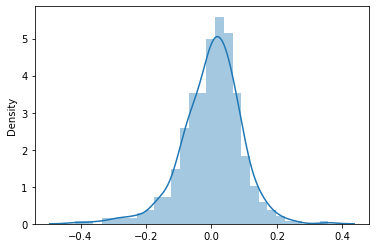

In [39]:
res = y_train - y_train_pre
sns.distplot(res)

## Note:
<b>From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly</b>

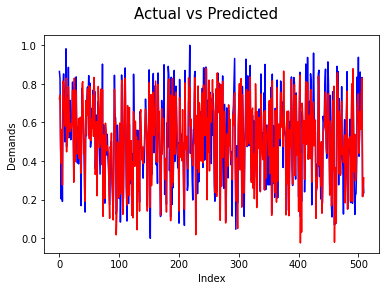

In [40]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pre, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and predected value of target variable seems to be pretty match, so we can conclude model is ok

## Validating homoscedasticity

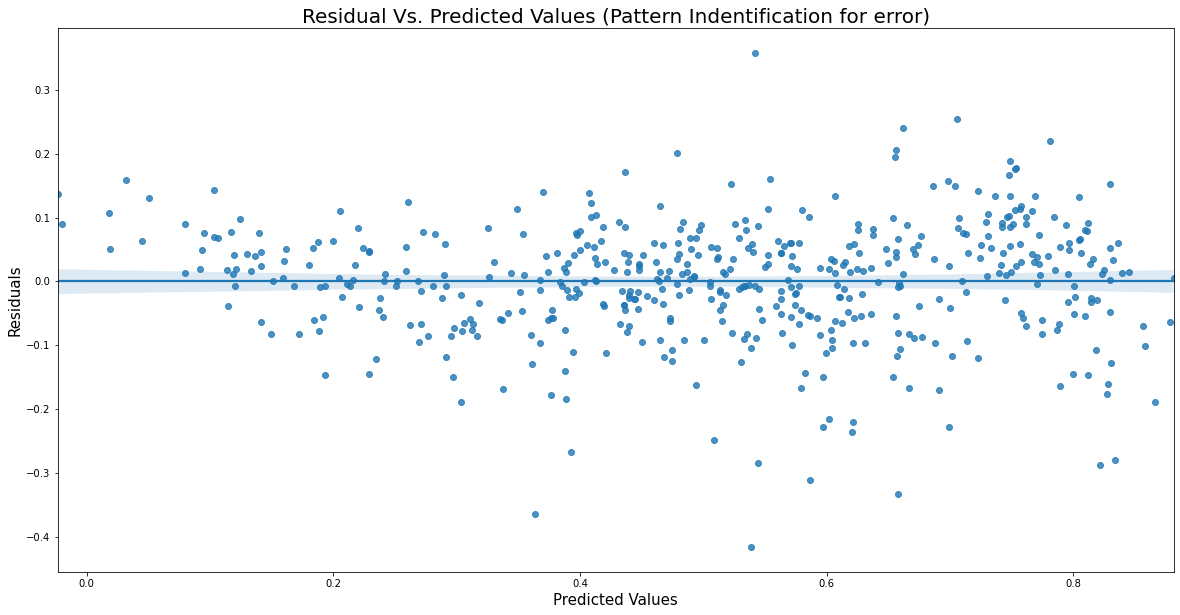

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.regplot(x=y_train_pre, y=res,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification for error)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [42]:
# making prediction on test set
# scaling the numeric values
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,1


In [43]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Rain,weathersit_clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
# spliting x_test and y_test
X_test = df_test[columns]

In [45]:
Y_test= df_test.pop('cnt')

In [46]:
# add constant
X_test_sm = sm.add_constant(X_test)

In [47]:
# predicting target variable using test feature variables
Y_test_pre = model.predict(X_test_sm)

<AxesSubplot:ylabel='Density'>

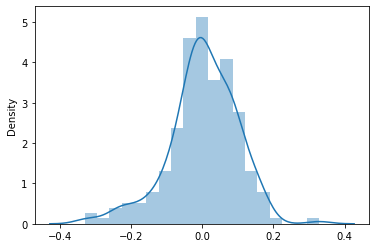

In [48]:
res = Y_test - Y_test_pre
sns.distplot(res)

Text(0, 0.5, 'Y_test_pre')

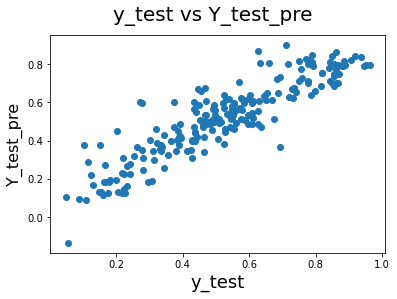

In [49]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(Y_test,Y_test_pre)
fig.suptitle('y_test vs Y_test_pre', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('Y_test_pre', fontsize=16)                          # Y-label

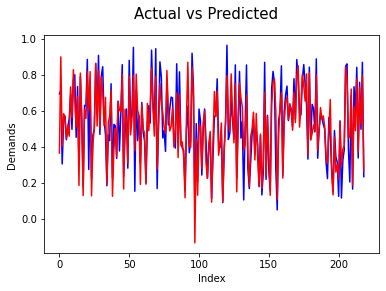

In [50]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,Y_test, color="blue")
plt.plot(c,Y_test_pre, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<b>Wel actual and predected value for test data is also seems to aligned properly and they seems to be match</b>

## Evaluating r2_score

In [51]:
columns

['yr',
 'holiday',
 'temp',
 'windspeed',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_July',
 'mnth_September',
 'weathersit_Light Rain',
 'weathersit_clear']

In [52]:
r2_score(y_true=Y_test, y_pred=Y_test_pre)

0.804941844098238

### r2_score 0.80 that is 80% coverage is quite good and our models seems to explain 80% of the data

## Formual

### Equation for best fitted line is
CNT(Target variable) = 0.1181 + (yr * 0.2335) + (holiday * -0.0980) + (temp * 0.4915) + (windspeed * -0.1480) + (season_spring * -0.0669) + (season_summer * 0.0453) + (season_winter * 0.0831) + (mnth_July * -0.0524) + (mnth_September * 0.0767) + (weathersit_Light Rain * -0.2036) + (weathersit_clear * 0.0816)

## Model Interpretetion 

- <b> significant variable for model building and predicting the target value cnt are listed as below </b>
    'yr',
    'holiday',
    'temp',
    'windspeed',
    'season_spring',
    'season_summer',
    'season_winter',
    'mnth_July',
    'mnth_September',
    'weathersit_Light Rain',
    'weathersit_clear'
- <b> Variable to focus on :</b> temp, weathersit_clear, season_winter
    - unit increment in temp raise the cnt by 0.49 units
    - unit increment in weathersit_clear raise the cnt by 0.081 units
    - unit increment in season_winter raise the cnt by 0.0831 units
